첫 번째 카드의 문양 (1-4)

첫 번째 카드의 숫자 (1-13)

두 번째 카드의 문양 (1-4)

두 번째 카드의 숫자 (1-13)

세 번째 카드의 문양 (1-4)

세 번째 카드의 숫자 (1-13)

네 번째 카드의 문양 (1-4)

네 번째 카드의 숫자 (1-13)

다섯 번째 카드의 문양 (1-4)

다섯 번째 카드의 숫자 (1-13)



하트 : 1
스페이스 : 2
다이아 : 3
클로버 : 4

# 0: 탑

# 1: 원페어

# 2: 투페어

# 3: 트리플

# 4: 스트레이트

# 5: 플러시

# 6: 풀하우스

# 7: 포카드

# 8: 스트레이트 플러시

# 9: 로얄 스트레이트 플러시

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")  # 모든 경고 무시

# 데이터셋 파일의 URL
url_train = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
url_test = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data"

# 컬럼명 설정
columns = ["A First Rank", "A First Suit", "A Second Rank", "A Second Suit", 
           "A Third Rank", "A Third Suit", "A Fourth Rank", "A Fourth Suit",
           "A Fifth Rank", "A Fifth Suit", "A Hand"]

# 데이터셋을 데이터프레임으로 로드
train = pd.read_csv(url_train, names=columns)
test = pd.read_csv(url_test, names=columns)

In [3]:
print(train.duplicated().sum())
print(test.duplicated().sum())

2
2128


In [4]:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [5]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [6]:
test.drop(test.index[97873: ], axis=0, inplace=True)

## 캐글에서 얻은 데이터는 5장으로 하는 포커 데이터 밖에없어서 내가 하고자 하는 예측에는 2장을 더 필요로 한다
## 따라서 무작위로 카드 두장을 더 넣는 함수를 만들었다.


In [7]:
range_hand = [0, 2, 4, 6, 8, 10, 12]
def create(train):
  train['A Sixth Rank'] = 0
  train['A Sixth Suit'] = 0
  train['A Seventh Rank'] = 0
  train['A Seventh Suit'] = 0
  train['A remain'] = 0
  import random
  for i in range(train.shape[0]):
    all_card = []
    card = []
    for k in range(1, 5):
      for j in range(1, 14):
        all_card.append(str(k)+str(j))
    for j in range_hand:
      card.append(str(train.iloc[i][j]) + str(train.iloc[i][j+1]))
    for j in range(5):
      all_card.remove(card[j])
    train['A remain'][i] = random.sample(all_card, 2)
  for i in range(train.shape[0]):
    train['A Sixth Rank'][i] = train['A remain'][i][0][0]
    train['A Sixth Suit'][i] = train['A remain'][i][0][1:]
    train['A Seventh Rank'][i] = train['A remain'][i][1][0]
    train['A Seventh Suit'][i] = train['A remain'][i][1][1:]
  train.drop(['A remain', 'A Hand'], axis = 1, inplace = True)

In [8]:
create(train)
train

,A First Rank,A First Suit,A Second Rank,A Second Suit,A Third Rank,A Third Suit,A Fourth Rank,A Fourth Suit,A Fifth Rank,A Fifth Suit,A Sixth Rank,A Sixth Suit,A Seventh Rank,A Seventh Suit
0,1,10,1,11,1,13,1,12,1,1,2,9,4,9
1,2,11,2,13,2,10,2,12,2,1,3,11,2,7
2,3,12,3,11,3,13,3,10,3,1,3,5,2,2
3,4,10,4,11,4,1,4,13,4,12,2,10,4,7
4,4,1,4,13,4,12,4,11,4,10,2,10,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25003,3,9,2,6,4,11,4,12,2,4,2,11,4,7
25004,4,1,4,10,3,13,3,4,1,10,4,8,3,6
25005,2,1,2,10,4,4,4,1,4,13,1,12,3,7
25006,2,12,4,3,1,10,1,12,4,9,4,2,1,4


In [10]:
create(test)

## 내가 갖고 있는 카드패의 모양과 숫자를 보고 포커의 족보를 맞추는 함수


In [11]:
train['A Hand'] = 0
test['A Hand'] = 0
def poker(train, a, mode):
  card = []
  for i in range_hand:
    card.append(str(train.iloc[a][i]) + str(train.iloc[a][i+1]))
  card.sort()
  count = 0
  count_flush = 0
  count_straight = 0
  count_triple = 0
  count_four = 0
  card_suit = []
  card_rank = []
  for i in range(7):
    card_rank.append(card[i][0])
    card_suit.append(card[i][1:])
  card_suit_set = set(card_suit)
  card_suit_set_list = list(card_suit_set)
  card_suit_set_list.sort()
  card_suit.sort()
  card_rank.sort()
  for i in range(1, 5):
    if card_rank.count(str(i)) >= 5:
      count_flush = 1
  for i in range(0, 6):
    if str(int(card_suit[i]) + 1) == card_suit[i+1]:
      count_straight = count_straight + 1
  for i in range(1,14):
    if card_suit.count(str(i)) == 2:
      count = count+1
    elif card_suit.count(str(i)) == 3:
      count_triple = 1
    elif card_suit.count(str(i)) == 4:
      count_four = 1
  if mode == 0:
    if (count == 1 and count_flush == 0 and count_straight < 4 and count_triple == 0 and count_four == 0):
      train['A Hand'][a] = '1'
    elif (count >= 2 and count_flush == 0 and count_straight < 4 and count_triple == 0 and count_four == 0):
      train['A Hand'][a] = '2'
    elif (count_triple == 1 and count_four == 0 and count_straight < 4 and count == 0 and count_flush == 0):
      train['A Hand'][a] = '3'
    elif count_straight >= 4 and count_flush == 0:
      train['A Hand'][a] = '4'
    elif count_flush == 1 and card_suit_set_list[:5] != ['1', '10', '11', '12', '13'] and count_straight < 4:
      train['A Hand'][a] = '5'
    elif (count >= 1 and count_triple == 1 and count_four == 0) or (count_triple == 2 and count_four == 0):
      train['A Hand'][a] = '6'
    elif count_four == 1:
      train['A Hand'][a] = '7'
    elif count_flush == 1 and count_straight >= 4 and card_suit_set_list[:5] != ['1', '10', '11', '12', '13']:
      train['A Hand'][a] = '8'
    elif count_flush == 1 and card_suit_set_list[:5] == ['1', '10', '11', '12', '13']:
      train['A Hand'][a] = '9'
    else:
      train['A Hand'][a] = '0'
  elif mode == 1:
    print(f'{a} = count : {count}, flush = {count_flush}, straight = {count_straight}, triple = {count_triple}, four = {count_four}, sum = {sum}, list = {card_suit_set_list}')

In [ ]:
for i in range(train.shape[0]):
  poker(train, i, 0)
train

In [ ]:
for i in range(train.shape[0]):
  poker(test, i, 0)
test

In [ ]:
for i in range(train.shape[0]):
  poker(train, i, 1)
train

## 상대방 X의 개방패를 만드는 함수

In [12]:
import random
def create_X(train, X='B'):
  train['X First Rank'] = 0
  train['X First Suit'] = 0
  train['X Second Rank'] = 0
  train['X Second Suit'] = 0
  train['X Third Rank'] = 0
  train['X Third Suit'] = 0
  train['X Fourth Rank'] = 0
  train['X Fourth Suit'] = 0
  train['X Fifth Rank'] = 0
  train['X Fifth Suit'] = 0
  train['X Sixth Rank'] = 0
  train['X Sixth Suit'] = 0
  train['X Seventh Rank'] = 0
  train['X Seventh Suit'] = 0
  train['X remain'] = 0
  for i in range(train.shape[0]):
    all_card = []
    card = []
    for k in range(1, 5):
      for j in range(1, 14):
        all_card.append(str(k)+str(j))
    for j in range_hand:
      card.append(str(train.iloc[i][j]) + str(train.iloc[i][j+1]))
    for j in range(5):
      all_card.remove(card[j])
    train['X remain'][i] = random.sample(all_card, 7)
  for i in range(train.shape[0]):
    train['X First Rank'][i] = train['X remain'][i][0][0]
    train['X First Suit'][i]= train['X remain'][i][0][1:]
    train['X Second Rank'][i] = train['X remain'][i][1][0]
    train['X Second Suit'][i] = train['X remain'][i][1][1:]
    train['X Third Rank'][i] = train['X remain'][i][2][0]
    train['X Third Suit'][i] = train['X remain'][i][2][1:]
    train['X Fourth Rank'][i] = train['X remain'][i][3][0]
    train['X Fourth Suit'][i] = train['X remain'][i][3][1:]
    train['X Fifth Rank'][i] = train['X remain'][i][4][0]
    train['X Fifth Suit'][i] = train['X remain'][i][4][1:]
    train['X Sixth Rank'][i] = train['X remain'][i][5][0]
    train['X Sixth Suit'][i] = train['X remain'][i][5][1:]
    train['X Seventh Rank'][i] = train['X remain'][i][6][0]
    train['X Seventh Suit'][i] = train['X remain'][i][6][1:]
  train.drop('X remain', axis = 1, inplace = True)
  train.columns = train.columns.where(~train.columns.str.startswith('X'), X + train.columns.str[1:])

In [13]:
create_X(train, X='B')
create_X(train, X='C')
create_X(train, X='D')
create_X(train, X='E')
create_X(train, X='F')
create_X(train, X='G')
create_X(test, X='B')
create_X(test, X='C')
create_X(test, X='D')
create_X(test, X='E')
create_X(test, X='F')
create_X(test, X='G')

In [47]:
train.drop('G Hand', axis=1)

,A First Rank,A First Suit,A Second Rank,A Second Suit,A Third Rank,A Third Suit,A Fourth Rank,A Fourth Suit,A Fifth Rank,A Fifth Suit,...,G Third Rank,G Third Suit,G Fourth Rank,G Fourth Suit,G Fifth Rank,G Fifth Suit,G Sixth Rank,G Sixth Suit,G Seventh Rank,G Seventh Suit
0,1,10,1,11,1,13,1,12,1,1,...,4,6,2,4,3,9,4,9,3,3
1,2,11,2,13,2,10,2,12,2,1,...,1,12,1,1,1,4,2,4,1,8
2,3,12,3,11,3,13,3,10,3,1,...,1,5,1,10,3,8,2,5,1,7
3,4,10,4,11,4,1,4,13,4,12,...,3,3,3,6,1,10,1,11,1,3
4,4,1,4,13,4,12,4,11,4,10,...,2,11,3,5,3,13,1,6,2,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25003,3,9,2,6,4,11,4,12,2,4,...,4,10,2,2,1,11,4,2,1,2
25004,4,1,4,10,3,13,3,4,1,10,...,2,13,2,9,2,12,3,3,2,3
25005,2,1,2,10,4,4,4,1,4,13,...,4,2,3,11,1,5,3,6,1,12
25006,2,12,4,3,1,10,1,12,4,9,...,1,4,4,10,1,9,2,6,3,10


In [14]:
# 상대방 (G)의 패
train_G = train[["G First Rank", "G First Suit", "G Second Rank", "G Second Suit", 
           "G Third Rank", "G Third Suit", "G Fourth Rank", "G Fourth Suit",
           "G Fifth Rank", "G Fifth Suit", "G Sixth Rank", "G Sixth Suit",
           "G Seventh Rank", "G Seventh Suit"]]

In [15]:
train_G

,G First Rank,G First Suit,G Second Rank,G Second Suit,G Third Rank,G Third Suit,G Fourth Rank,G Fourth Suit,G Fifth Rank,G Fifth Suit,G Sixth Rank,G Sixth Suit,G Seventh Rank,G Seventh Suit
0,3,5,2,10,4,6,2,4,3,9,4,9,3,3
1,2,2,3,12,1,12,1,1,1,4,2,4,1,8
2,1,2,3,9,1,5,1,10,3,8,2,5,1,7
3,2,11,1,12,3,3,3,6,1,10,1,11,1,3
4,2,6,1,12,2,11,3,5,3,13,1,6,2,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25003,3,1,1,6,4,10,2,2,1,11,4,2,1,2
25004,1,1,4,12,2,13,2,9,2,12,3,3,2,3
25005,2,3,4,6,4,2,3,11,1,5,3,6,1,12
25006,2,5,3,12,1,4,4,10,1,9,2,6,3,10


In [17]:
test_G = test[["G First Rank", "G First Suit", "G Second Rank", "G Second Suit", 
           "G Third Rank", "G Third Suit", "G Fourth Rank", "G Fourth Suit",
           "G Fifth Rank", "G Fifth Suit", "G Sixth Rank", "G Sixth Suit",
           "G Seventh Rank", "G Seventh Suit"]]

In [18]:
test_G

,G First Rank,G First Suit,G Second Rank,G Second Suit,G Third Rank,G Third Suit,G Fourth Rank,G Fourth Suit,G Fifth Rank,G Fifth Suit,G Sixth Rank,G Sixth Suit,G Seventh Rank,G Seventh Suit
0,2,6,3,7,4,5,2,5,1,2,4,13,3,4
1,2,6,2,8,2,13,4,12,4,9,1,3,1,1
2,2,1,3,12,3,5,2,12,4,5,4,7,4,3
3,2,4,1,6,3,11,3,8,1,12,1,8,3,12
4,4,7,3,5,2,13,1,1,4,4,3,8,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97868,4,3,3,5,4,7,1,9,1,13,2,12,2,8
97869,2,12,3,6,1,8,2,1,2,9,1,4,4,10
97870,4,11,4,5,1,2,2,7,1,6,4,12,3,1
97871,3,3,2,6,1,3,3,9,1,8,1,7,3,12


In [19]:
train_G['G Hand'] = 0
test_G['G Hand'] = 0
def poker_G(train, a, mode):
  card = []
  for i in range_hand:
    card.append(str(train.iloc[a][i]) + str(train.iloc[a][i+1]))
  card.sort()
  count = 0
  count_flush = 0
  count_straight = 0
  count_triple = 0
  count_four = 0
  card_suit = []
  card_rank = []
  for i in range(7):
    card_rank.append(card[i][0])
    card_suit.append(card[i][1:])
  card_suit_set = set(card_suit)
  card_suit_set_list = list(card_suit_set)
  card_suit_set_list.sort()
  card_suit.sort()
  card_rank.sort()
  for i in range(1, 5):
    if card_rank.count(str(i)) >= 5:
      count_flush = 1
  for i in range(0, 6):
    if str(int(card_suit[i]) + 1) == card_suit[i+1]:
      count_straight = count_straight + 1
  for i in range(1,14):
    if card_suit.count(str(i)) == 2:
      count = count+1
    elif card_suit.count(str(i)) == 3:
      count_triple = 1
    elif card_suit.count(str(i)) == 4:
      count_four = 1
  if mode == 0:
    if (count == 1 and count_flush == 0 and count_straight < 4 and count_triple == 0 and count_four == 0):
      train['G Hand'][a] = '1'
    elif (count >= 2 and count_flush == 0 and count_straight < 4 and count_triple == 0 and count_four == 0):
      train['G Hand'][a] = '2'
    elif (count_triple == 1 and count_four == 0 and count_straight < 4 and count == 0 and count_flush == 0):
      train['G Hand'][a] = '3'
    elif count_straight >= 4 and count_flush == 0:
      train['G Hand'][a] = '4'
    elif count_flush == 1 and card_suit_set_list[:5] != ['1', '10', '11', '12', '13'] and count_straight < 4:
      train['G Hand'][a] = '5'
    elif (count >= 1 and count_triple == 1 and count_four == 0) or (count_triple == 2 and count_four == 0):
      train['G Hand'][a] = '6'
    elif count_four == 1:
      train['G Hand'][a] = '7'
    elif count_flush == 1 and count_straight >= 4 and card_suit_set_list[:5] != ['1', '10', '11', '12', '13']:
      train['G Hand'][a] = '8'
    elif count_flush == 1 and card_suit_set_list[:5] == ['1', '10', '11', '12', '13']:
      train['G Hand'][a] = '9'
    else:
      train['G Hand'][a] = '0'
  elif mode == 1:
    print(f'{a} = count : {count}, flush = {count_flush}, straight = {count_straight}, triple = {count_triple}, four = {count_four}, sum = {sum}, list = {card_suit_set_list}')

In [20]:
for i in range(train_G.shape[0]):
  poker_G(train_G, i, 0)

In [21]:
for i in range(test_G.shape[0]):
  poker_G(test_G, i, 0)

In [22]:
train['G Hand'] = train_G['G Hand']

In [23]:
test['G Hand'] = test_G['G Hand']

In [24]:
train

,A First Rank,A First Suit,A Second Rank,A Second Suit,A Third Rank,A Third Suit,A Fourth Rank,A Fourth Suit,A Fifth Rank,A Fifth Suit,...,G Third Suit,G Fourth Rank,G Fourth Suit,G Fifth Rank,G Fifth Suit,G Sixth Rank,G Sixth Suit,G Seventh Rank,G Seventh Suit,G Hand
0,1,10,1,11,1,13,1,12,1,1,...,6,2,4,3,9,4,9,3,3,1
1,2,11,2,13,2,10,2,12,2,1,...,12,1,1,1,4,2,4,1,8,2
2,3,12,3,11,3,13,3,10,3,1,...,5,1,10,3,8,2,5,1,7,1
3,4,10,4,11,4,1,4,13,4,12,...,3,3,6,1,10,1,11,1,3,2
4,4,1,4,13,4,12,4,11,4,10,...,11,3,5,3,13,1,6,2,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25003,3,9,2,6,4,11,4,12,2,4,...,10,2,2,1,11,4,2,1,2,3
25004,4,1,4,10,3,13,3,4,1,10,...,13,2,9,2,12,3,3,2,3,2
25005,2,1,2,10,4,4,4,1,4,13,...,2,3,11,1,5,3,6,1,12,1
25006,2,12,4,3,1,10,1,12,4,9,...,4,4,10,1,9,2,6,3,10,1


In [25]:
test

,A First Rank,A First Suit,A Second Rank,A Second Suit,A Third Rank,A Third Suit,A Fourth Rank,A Fourth Suit,A Fifth Rank,A Fifth Suit,...,G Third Suit,G Fourth Rank,G Fourth Suit,G Fifth Rank,G Fifth Suit,G Sixth Rank,G Sixth Suit,G Seventh Rank,G Seventh Suit,G Hand
0,1,1,1,13,2,4,2,3,1,12,...,5,2,5,1,2,4,13,3,4,1
1,3,12,3,2,3,11,4,5,2,5,...,13,4,12,4,9,1,3,1,1,0
2,1,9,4,6,1,4,3,2,3,9,...,5,2,12,4,5,4,7,4,3,2
3,1,4,3,13,2,13,2,1,3,6,...,11,3,8,1,12,1,8,3,12,2
4,3,10,2,7,1,2,2,11,4,9,...,13,1,1,4,4,3,8,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97868,3,7,1,1,4,2,1,10,2,1,...,7,1,9,1,13,2,12,2,8,0
97869,3,7,2,10,2,6,3,13,4,3,...,8,2,1,2,9,1,4,4,10,0
97870,2,2,1,7,1,13,3,7,2,3,...,2,2,7,1,6,4,12,3,1,0
97871,1,1,4,7,2,9,2,4,4,1,...,3,3,9,1,8,1,7,3,12,1


In [48]:
train['G Hand'].value_counts(sort=True)

1    10955
2     5828
0     3877
4     1646
3     1210
5      691
6      686
8       70
7       41
9        4
Name: G Hand, dtype: int64

In [42]:
test['G Hand'].value_counts(sort=True)

1    42587
2    22992
0    15436
4     6365
3     4898
5     2649
6     2476
8      314
7      130
9       26
Name: G Hand, dtype: int64

<Axes: >

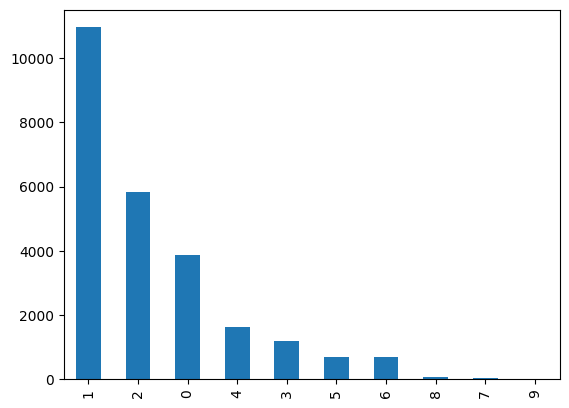

In [44]:
import matplotlib.pyplot as plt
train['G Hand'].value_counts().plot.bar()

<Axes: >

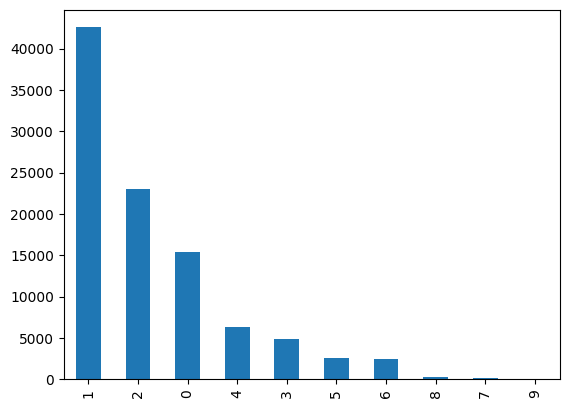

In [39]:
test['G Hand'].value_counts().plot.bar()

In [28]:
# csv 파일 저장을 위한 구글 드라이브 마운트
import sys

if "google.colab" in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
train.to_csv('poker_train_remix2.csv', index=False)
test.to_csv('poker_test_remix2.csv', index=False)